In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [344]:
df = pd.read_csv("/content/drive/MyDrive/breast_cancer/datasets/data.csv",
                 index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [345]:
df = df.drop(["Unnamed: 32"], axis=1)
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [346]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [347]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [348]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [349]:
df["diagnosis"] = df["diagnosis"].astype("int8")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int8   
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

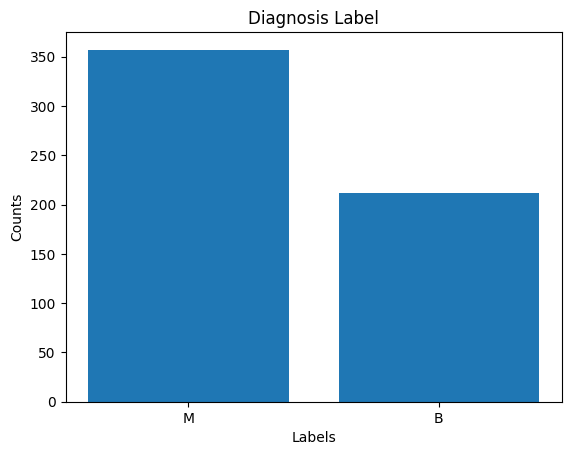

In [350]:
plt.bar(["M", "B"], df["diagnosis"].value_counts())
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Diagnosis Label")
plt.show()

In [351]:
df = df.reset_index(drop=True)
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [352]:
X = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]

In [353]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    stratify=y)

In [354]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 421 to 81
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              455 non-null    float64
 1   texture_mean             455 non-null    float64
 2   perimeter_mean           455 non-null    float64
 3   area_mean                455 non-null    float64
 4   smoothness_mean          455 non-null    float64
 5   compactness_mean         455 non-null    float64
 6   concavity_mean           455 non-null    float64
 7   concave points_mean      455 non-null    float64
 8   symmetry_mean            455 non-null    float64
 9   fractal_dimension_mean   455 non-null    float64
 10  radius_se                455 non-null    float64
 11  texture_se               455 non-null    float64
 12  perimeter_se             455 non-null    float64
 13  area_se                  455 non-null    float64
 14  smoothness_se            

In [355]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [356]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import log_loss, accuracy_score

params = {
    "objective": "binary",
    "num_leaves": 5,
    "seed": 0,
    "verbose": -1,
    "boosting_type": "gbdt",
    "learning_rate": .01
}

In [357]:
accuracy_scores = []
logloss_scores = []
models = []
oof = np.zeros(len(X_train))

In [358]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for fold, (tr_idx, va_idx) in enumerate(kf.split(X=X_train, y=y_train)):
    X_tr = X_train.iloc[tr_idx, :]
    y_tr = y_train.iloc[tr_idx]
    X_va = X_train.iloc[va_idx, :]
    y_va = y_train.iloc[va_idx]

    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_va, y_va, reference=lgb_train)

    model = lgb.train(params=params,
                      train_set=lgb_train,
                      num_boost_round=1000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=["train", "valid"],
                      callbacks=[lgb.early_stopping(20),
                                 lgb.log_evaluation(100)])

    y_va_pred = model.predict(X_va, num_iteration=model.best_iteration)
    accuracy = accuracy_score(y_va, np.round(y_va_pred))
    logloss = log_loss(y_va, y_va_pred)
    print(f"fold:{fold+1}, accuracy:{accuracy:.4f}, logloss:{logloss:.4f}")
    print("-------------------------------------------------------------------")

    accuracy_scores.append(accuracy)
    logloss_scores.append(logloss)
    models.append(model)
    oof[va_idx] = y_va_pred

Training until validation scores don't improve for 20 rounds
[100]	train's binary_logloss: 0.258617	valid's binary_logloss: 0.283369
[200]	train's binary_logloss: 0.1293	valid's binary_logloss: 0.171409
[300]	train's binary_logloss: 0.0728427	valid's binary_logloss: 0.132215
[400]	train's binary_logloss: 0.0428717	valid's binary_logloss: 0.11792
[500]	train's binary_logloss: 0.0264788	valid's binary_logloss: 0.109222
[600]	train's binary_logloss: 0.0167361	valid's binary_logloss: 0.101199
[700]	train's binary_logloss: 0.0108901	valid's binary_logloss: 0.0931483
[800]	train's binary_logloss: 0.00714125	valid's binary_logloss: 0.0881781
Early stopping, best iteration is:
[808]	train's binary_logloss: 0.00690371	valid's binary_logloss: 0.0879141
fold:1, accuracy:0.9670, logloss:0.0879
-------------------------------------------------------------------
Training until validation scores don't improve for 20 rounds
[100]	train's binary_logloss: 0.255266	valid's binary_logloss: 0.294977
[200]	

In [359]:
cv_accuracy = np.mean(accuracy_scores)
cv_logloss = np.mean(logloss_scores)
print(f"cv_accuracy: {cv_accuracy:.4f}, cv_logloss:{cv_logloss:.4f}")



cv_accuracy: 0.9538, cv_logloss:0.1223


In [360]:
import pickle

filename = '/content/drive/MyDrive/breast_cancer/model.sav'
pickle.dump(model, open(filename, 'wb'))

In [361]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred

array([0.02571686, 0.00341637, 0.01490691, 0.11776027, 0.99648147,
       0.00448187, 0.00257476, 0.94033256, 0.99381536, 0.0045127 ,
       0.00285027, 0.82640533, 0.00369323, 0.00305021, 0.00521216,
       0.9945277 , 0.99602853, 0.00473178, 0.0100057 , 0.0036154 ,
       0.99249913, 0.84728454, 0.02033806, 0.9956671 , 0.00837738,
       0.00396509, 0.02471572, 0.00348899, 0.00660039, 0.02537226,
       0.99346337, 0.09008373, 0.00476991, 0.00354845, 0.99648147,
       0.99441846, 0.00384153, 0.99634286, 0.9933674 , 0.01084724,
       0.00438307, 0.00265422, 0.99598949, 0.01320074, 0.83001981,
       0.9876912 , 0.00515629, 0.00360289, 0.00319117, 0.00663831,
       0.99208343, 0.95111687, 0.06236833, 0.18081787, 0.00364716,
       0.00300074, 0.99645681, 0.98414103, 0.00469649, 0.00738826,
       0.00727612, 0.99662427, 0.99648147, 0.99662427, 0.98285499,
       0.01805801, 0.94179925, 0.98660715, 0.9902605 , 0.00721512,
       0.01972222, 0.00287315, 0.00546128, 0.0229524 , 0.98401

In [362]:
!pip install seaborn_analyzer
from seaborn_analyzer import classplot


NameError: ignored

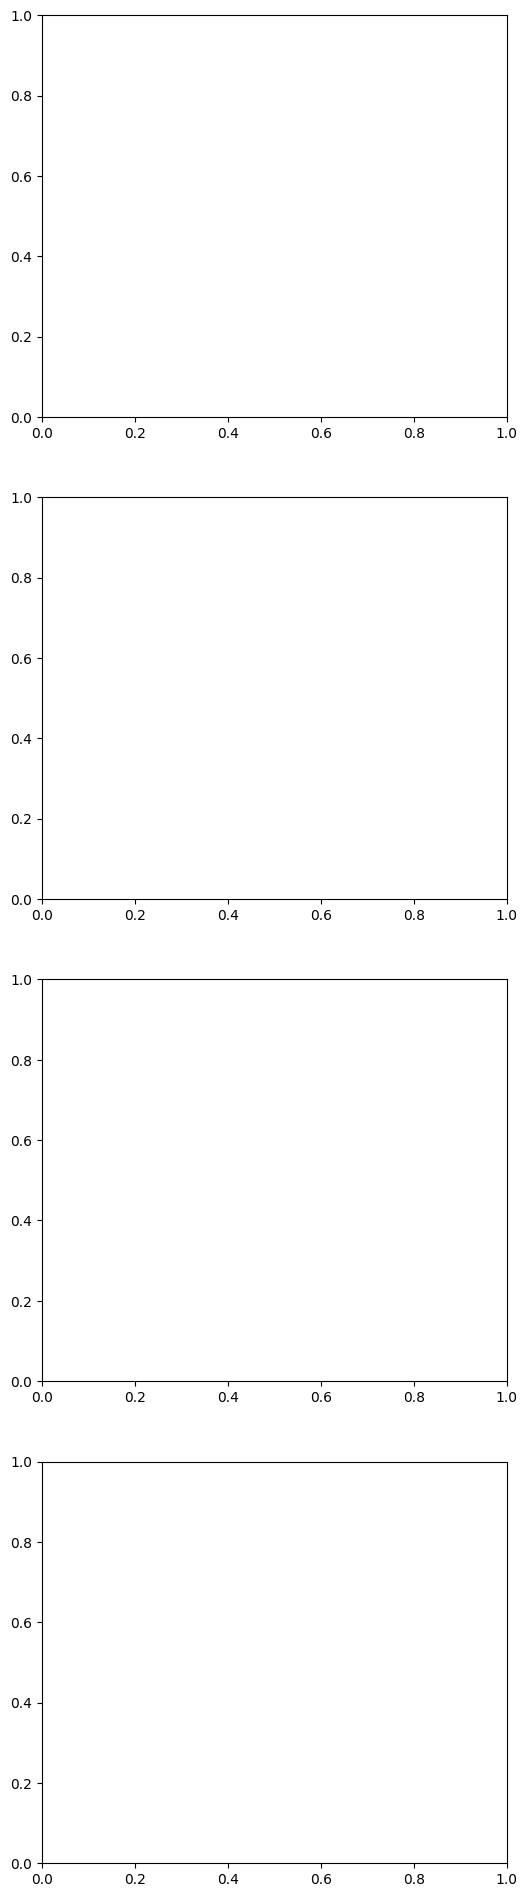

In [364]:
plt.show()